# Assignment For KNN Regressor & Linear Regression with Hyper Parameter Tunings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.shape

(8555, 3)

In [5]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [7]:
df.Gender=le.fit_transform(df['Gender'])

In [8]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [9]:
x=df.drop(['Weight'],axis=1)
y=df['Weight']

In [10]:
df.columns

Index(['Gender', 'Height', 'Weight'], dtype='object')

In [11]:
from sklearn.preprocessing import MinMaxScaler
mmx=MinMaxScaler()

In [12]:
newx=mmx.fit_transform(x)

In [13]:
newx

array([[1.        , 0.74439877],
       [1.        , 0.54832843],
       [1.        , 0.75458291],
       ...,
       [0.        , 0.42453987],
       [0.        , 0.49599516],
       [0.        , 0.24406373]])

In [14]:
x=pd.DataFrame(newx,columns=x.columns)

In [15]:
x.head()

,Gender,Height
0,1.0,0.744399
1,1.0,0.548328
2,1.0,0.754583
3,1.0,0.662487
4,1.0,0.590905


In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1)

In [17]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [18]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [19]:
pred=reg.predict(xtest)

In [20]:
pred

array([143.83013436, 197.53417989, 184.63515112, ..., 160.7078525 ,
       186.82852694, 201.4226542 ])

In [21]:
reg.score(xtest,ytest)

0.9059959607091161

# K-nearest Neighbours Regression

In [22]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=190)

In [23]:
knr.fit(xtrain,ytrain)

KNeighborsRegressor(n_neighbors=190)

In [24]:
pred2=knr.predict(xtest)
pred2

array([144.08660245, 196.83214029, 184.51840347, ..., 160.42307534,
       186.06840404, 201.85646539])

In [25]:
knr.score(xtest,ytest)

0.9015475031646729

# Mean Squared Error

In [26]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(ytest,pred2)

In [27]:
mse

104.38921079847279

# Hyper Parameter Optimization

In [28]:
error=[]

for i in range(15,200,10):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    y_pred=knn.predict(xtest)
    error.append(np.mean(y_pred-ytest))

In [29]:
error

[-0.32630725937722366,
 -0.3655599136197886,
 -0.3622146465078725,
 -0.3383256231936984,
 -0.32441355137613576,
 -0.3099559975929384,
 -0.31724723999277943,
 -0.31572682790439616,
 -0.30935903865105674,
 -0.31323606584358227,
 -0.3127704510633977,
 -0.31781983493743604,
 -0.3057100707744739,
 -0.30386011126058865,
 -0.29621523594905547,
 -0.3034705740005431,
 -0.2995432923965272,
 -0.29381169168382515,
 -0.2904910825315786]

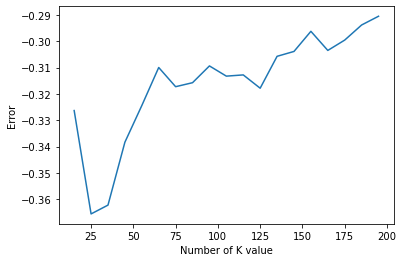

In [30]:
plt.xlabel('Number of K value')
plt.ylabel('Error')

plt.plot(range(15,200,10),error)